
[MusicBrainz API](https://musicbrainz.org/doc/MusicBrainz_API)

[Spotipy Documentation](https://spotipy.readthedocs.io/en/2.22.1/)

[Genius API](https://genius.com/api-clients)

CLIENT ID: H7Li3aBiJNJr8aGIND8PXU71ZsYmwCisuvbxgHigJlQXY6PZsy__lNfpAwVJ27MU  
  
CLIENT SECRET: fXo7nlX8_60hvV6qOd9WywiPWgSok1hwVPXvo9yeYVoilCUJ8fYoStvd36uEIgvyjLoKehe7fifKHSdNN7Plng

CLIENT ACCESS TOKEN: bG-MIk6QidIuDMV7OBlexm0ZvnA6mjWYyY1wW_8dlf6DxxqXPRVCbD-6KTaXkAmS  

In [1]:
import requests
from bs4 import BeautifulSoup
import lyricsgenius
import re
import pandas as pd
import numpy as np
import torch

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

### Classifiche FIMI

We developed a webscraper tool to get the entire list of FIMI charts.   
After fetching all the charts, we stored the data in `FIMI.csv`

In [2]:
from scraper import ChartScraper

cs = ChartScraper()
# FIMI =  cs.scrape(1990, 2024) # code used for the project (takes hours to run), use the above for testing
# FIMI.to_csv('FIMI.csv')

In [3]:
# Sample Case
cs.get_chart(Year=2019,
             Week=4
             )

c:\Users\giaco\Desktop\240504_gender-bias-songs-lyrics\scraper.py:37: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file c:\Users\giaco\Desktop\240504_gender-bias-songs-lyrics\scraper.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(outerHTML)


,Year,Week,Position,Title,Artist
0,2019.0,4.0,1,STAMM FORT,LUCHÈ FEAT. SFERA EBBASTA
1,2019.0,4.0,2,È SEMPRE BELLO,COEZ
2,2019.0,4.0,3,CALMA (REMIX),PEDRO CAPÓ FEAT. FARRUKO
3,2019.0,4.0,4,IL CIELO NELLA STANZA,SALMO FEAT. NSTASIA
4,2019.0,4.0,5,7 RINGS,ARIANA GRANDE
...,...,...,...,...,...
95,2019.0,4.0,96,SECRETO,ANUEL AA & KAROL G
96,2019.0,4.0,97,MY LIFE IS GOING ON,BURAK YETER & CECILIA KRULL
97,2019.0,4.0,98,VERDURA,PINGUINI TATTICI NUCLEARI
98,2019.0,4.0,99,RICCHI E MORTI,SALMO


### Get Lyrics

We now move on to retrieve the corresponding lyrics.

In [40]:
data = pd.read_csv('G:/My Drive/[02] Projects/230930_GenderBiasSongsLyrics/FIMI.csv', index_col=0)
print('Unique Songs: ', data.Title.unique().shape[0])
print('Unique Artist: ', data.Artist.unique().shape[0])
print('Unique Song-Artist: ', data[['Title','Artist']].drop_duplicates(keep='first').shape[0])
df = data[~data[['Title','Artist']].duplicated(keep='first')]

Unique Songs:  9182
Unique Artist:  4736
Unique Song-Artist:  10236


In [41]:
TOKEN = 'bG-MIk6QidIuDMV7OBlexm0ZvnA6mjWYyY1wW_8dlf6DxxqXPRVCbD-6KTaXkAmS'
genius= lyricsgenius.Genius(TOKEN)

In [42]:
for i, row in df.iterrows():
    try:
        song = genius.search_song(row.Title)
        df.loc[i, 'Year_released'] = song.to_dict()['release_date_components']['year']
        df.loc[i, 'Lyrics'] = song.lyrics
    except:
        print(f'Error.')


Searching for "BARREL OF A GUN"...
Done.
Searching for "DISCOTHÈQUE"...


C:\Users\giaco\AppData\Local\Temp\ipykernel_60344\2997688170.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'Year_released'] = song.to_dict()['release_date_components']['year']
C:\Users\giaco\AppData\Local\Temp\ipykernel_60344\2997688170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'Lyrics'] = song.lyrics


Done.
Searching for "DON'T CRY FOR ME ARGENTINA"...
Done.
Searching for "LET A BOY CRY"...
Done.
Searching for "THE RIDE ON THE RHYTHM"...
Done.
Searching for "FIRST MISSION"...
Done.
Searching for "SWEET DREAMS"...
Done.
Searching for "BOHEMIAN RHAPSODY"...
Done.
Searching for "ONE AND ONE"...
Done.
Searching for "LITTLE WONDER"...
Done.
Searching for "CLEMENTINE"...
Done.
Searching for "TIC TIC TAC"...
Done.
Searching for "THE RHYTHM IS MAGIC"...
Done.
Searching for "I FINALLY FOUND SOMEONE"...
Done.
Searching for "YOUR WOMAN"...
Done.
Searching for "...E DIMMI CHE NON VUOI MORIRE"...
Done.
Searching for "LAURA NON C'È"...
Done.
Searching for "FROM DISCO TO DISCO"...
Done.
Error.
Searching for "CONFUSA E FELICE"...
Done.
Searching for "AMO T'AMO TI AMO"...
Done.
Searching for "I SHOT THE SHERIFF"...
Done.
Searching for "ANOTHER SUITCASE IN ANOTHER HALL"...
Done.
Searching for "SHE LOVES ME"...
Done.
Searching for "THE REAL THING"...
Done.
Searching for "NO NAME"...
Done.
Searching fo

### Check Language

In [353]:
df = pd.read_csv('G:/My Drive/[02] Projects/230930_GenderBiasSongsLyrics/FIMI_filtered_lyrics.csv', index_col=0)

df.head()

,Year,Week,Position,Title,Artist,Year_released,Lyrics
0,1997.0,6.0,1,BARREL OF A GUN,DEPECHE MODE,1997.0,20 ContributorsBarrel of a Gun Lyrics[Verse 1]...
1,1997.0,6.0,2,DISCOTHÈQUE,U2,1997.0,15 ContributorsDiscothèque Lyrics[Verse 1]\nYo...
2,1997.0,6.0,3,DON'T CRY FOR ME ARGENTINA,MADONNA,1976.0,20 ContributorsDon’t Cry for Me Argentina Lyri...
3,1997.0,6.0,4,LET A BOY CRY,GALA,1997.0,3 ContributorsLet A Boy Cry Lyrics[Verse 1]\nI...
4,1997.0,6.0,5,THE RIDE ON THE RHYTHM,BLACKWOOD,2011.0,15 ContributorsLee Majors Come Again Lyrics[In...


In [354]:
from transformers import pipeline

model_path = 'papluca/xlm-roberta-base-language-detection'
language_detector = pipeline(model=model_path, tokenizer=model_path)
language_detector('ciao come stai')

[{'label': 'it', 'score': 0.9947423934936523}]

In [355]:
for i, row in df.iterrows():
    print(f'Checking "{row.Title}"')
    try:
        df.loc[i, 'Language'] = language_detector(row.Lyrics[50:150])[0]['label']
    except:
        print(f'Error.')

Checking "BARREL OF A GUN"
Checking "DISCOTHÈQUE"
Checking "DON'T CRY FOR ME ARGENTINA"
Checking "LET A BOY CRY"
Checking "THE RIDE ON THE RHYTHM"
Checking "FIRST MISSION"
Checking "SWEET DREAMS"
Checking "BOHEMIAN RHAPSODY"
Checking "ONE AND ONE"
Checking "LITTLE WONDER"
Checking "CLEMENTINE"
Checking "TIC TIC TAC"
Checking "THE RHYTHM IS MAGIC"
Checking "I FINALLY FOUND SOMEONE"
Checking "YOUR WOMAN"
Checking "...E DIMMI CHE NON VUOI MORIRE"
Checking "LAURA NON C'È"
Checking "FROM DISCO TO DISCO"
Error.
Checking "CONFUSA E FELICE"
Checking "AMO T'AMO TI AMO"
Checking "I SHOT THE SHERIFF"
Checking "ANOTHER SUITCASE IN ANOTHER HALL"
Checking "SHE LOVES ME"
Checking "THE REAL THING"
Checking "NO NAME"
Checking "ANGELS OF LOVE"
Checking "2 THE NIGHT"
Error.
Checking "DON'T SPEAK"
Checking "UNDERWATER LOVE"
Checking "UN-BREAK MY HEART"
Checking "IT'S NO GOOD"
Checking "MY LOVE FOR YOU"
Checking "MAMA / WHO DO YOU THINK YOU ARE"
Checking "AROUND THE WORLD"
Checking "BLOOD ON THE DANCE FLOO

### Word2Vec

In [2]:
# Import dataset with FIMI songs, lyrics and langauge detected

In [17]:
df = pd.read_csv('G:/My Drive/[02] Projects/230930_GenderBiasSongsLyrics/FIMI_filtered_lyrics_lang.csv', index_col=0)
print("Before language filtering:", df.shape)
df = df[df.Language == 'it']
print("After:", df.shape)


Before language filtering: (10236, 8)
After: (3556, 8)


In [18]:
# Some cleaning
df.Lyrics = df.Lyrics.str.replace(r'^.+Lyrics', ' ', regex=True)
# df.Lyrics = df.Lyrics.str.replace(r'\[.+\]', ' ', regex=True)
# # df.Lyrics = df.Lyrics.str.replace(r'\(.+\)', ' ', regex=True)
# df.Lyrics = df.Lyrics.str.replace(r'\n \n', '\n\n', regex=True)
# df.Lyrics = df.Lyrics.str.replace(r'\n', ' ', regex=True)
# df.Lyrics = df.Lyrics.str.replace('[-.?!,:;()|0-9"\'…]', ' ', regex=True)
# df.Lyrics = df.Lyrics.str.replace('  ', ' ', regex=True)
df.Lyrics = df.Lyrics.str.strip()
df.Lyrics = df.Lyrics.str.lower()

df.head()

,Year,Week,Position,Title,Artist,Year_released,Lyrics,Language
31,1997.0,9.0,2,...E DIMMI CHE NON VUOI MORIRE,PATTY PRAVO,1997.0,guarda…io sono da sola ormai\ncredi…non c'e' p...,it
32,1997.0,9.0,3,LAURA NON C'È,NEK,1997.0,"[testo di ""laura non c'è""]\n\n[strofa 1]\nlaur...",it
37,1997.0,9.0,8,CONFUSA E FELICE,CARMEN CONSOLI,1997.0,"[testo di ""confusa e felice""]\n\n[intro]\nah, ...",it
38,1997.0,9.0,9,AMO T'AMO TI AMO,LIONEL RICHIE,1998.0,"eravamo fidanzati, poi\ntu mi hai lasciato\nse...",it
128,1997.0,18.0,9,COSÌ E COSÀ,ARTICOLO 31,1997.0,"[testo di ""così e cosà""]\n\n[intro]\nma dove v...",it


In [19]:
PATH = './data/corpus.txt'

with open(PATH, 'w') as file:
    for i in df.Lyrics:
        file.write(i)
        file.write('\n\n')

Tokenize corpus

In [5]:
from nltk.tokenize import word_tokenize

# Tokenize corpus
corpus = df.Lyrics.to_list()
tokenized_corpus = [word_tokenize(document.lower()) for document in corpus]

Check existence of token in ita dict

In [ ]:
# from nltk.tokenize import word_tokenize

# # Dict of italian words
# ita = open("paroleuniche.txt").read().splitlines()
# ita = pd.Series(ita).str.lower().to_list()
# ita = sorted(list(set(ita)))

# # Cross check existence
# tokenized_corpus = [[token for token in document if len(token) >= 3 and token in ita] for document in tokenized_corpus]

Filter len(token)

In [105]:
# Check Lenght
tokenized_corpus = [[token for token in document if len(token) >= 2] for document in tokenized_corpus]

#### Ita

In [6]:
import nltk.corpus

# Define stopwords
stopwords = set(nltk.corpus.stopwords.words('italian'))
# stopwords = set(nltk.corpus.stopwords.words('english'))

to_add = ['ah', 'ehi', 'yah', 'già', 'uh', 'so', 'ehh', 'po', 'cè', 'oh', 'yey', 'ohoh', 'ohohohembed']
for i in to_add:
    stopwords.add(i)

stopwords = []
# Remove stopwords
filtered_corpus = []
for document in tokenized_corpus:
    filtered_document = [token for token in document if token not in stopwords]
    filtered_corpus.append(filtered_document)

#### Train

We used the Gensim implementation of Word2Vec
to learn word embeddings with window length 5, embedding dimension 300,
and 40 training steps. Words occurring less than 5 times were discarded.

In [7]:
from gensim.models import Word2Vec

# Train Embeddings
model = Word2Vec(sentences=filtered_corpus, vector_size=300, window=5, min_count=5, workers=4, epochs=40)
word_vectors = model.wv
vocabulary = model.wv.index_to_key

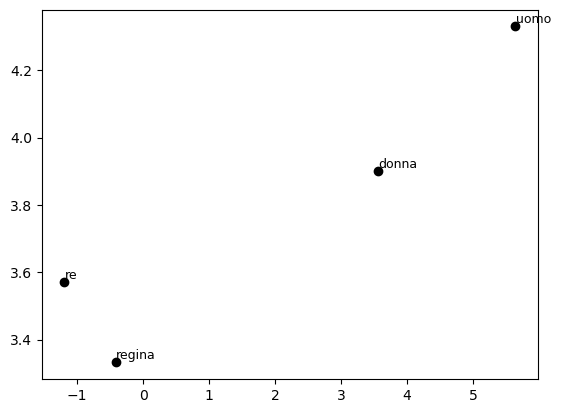

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA
vectors_100d = np.array([word_vectors[i] for i in vocabulary])
pca = PCA(n_components=2)
pca.fit(vectors_100d)

# Plot 2-dim
for w in ['re', 'regina', 'uomo', 'donna']:
    v = pca.transform(word_vectors[w].reshape(1, -1)).ravel()
    plt.scatter(v[0],v[1], c='black')
    plt.text(v[0] + 0.01,v[1] + 0.01, w, fontsize=9)

# for w in ['king', 'queen', 'man', 'woman']:
#     v = pca.transform(word_vectors[w].reshape(1, -1)).ravel()
#     plt.scatter(v[0],v[1], c='black')
#     plt.text(v[0] + 0.01,v[1] + 0.01, w, fontsize=9)

In [11]:
# Finding the most similar words to a given word
target = np.random.choice(vocabulary)
similar_words = word_vectors.most_similar(target)
print(f"Words similar to '{target}':")
for word in similar_words:
    print(word)

Words similar to 'urbana':
('giungla', 0.47925975918769836)
('circonvallazione', 0.4411129951477051)
('rispondiamo', 0.41504794359207153)
('preoccupata', 0.4142003059387207)
('corsia', 0.4125617742538452)
('alimentare', 0.4038902223110199)
('bacche', 0.3950662910938263)
('dende', 0.39452075958251953)
('pablo', 0.38554608821868896)
('cappa', 0.378807932138443)


### WEAT

In [12]:
# Measure WEAT
def S(w, A, B):
    
    simA = np.array([model.wv.similarity(w,i) for i in A])
    simB = np.array([model.wv.similarity(w,i) for i in B])

    return np.mean(simA) - np.mean(simB)

def WEAT(X, Y, A, B):
    
    X = [word for word in X if word in vocabulary]
    Y = [word for word in Y if word in vocabulary]
    A = [word for word in A if word in vocabulary]
    B = [word for word in B if word in vocabulary]
    print(X,Y,A,B)
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    stdev = np.std( np.concatenate([X_AB, Y_AB]) )
    
    return (np.mean(X_AB) - np.mean(Y_AB)) / stdev

# T-statistic
def T(X, Y, A, B):

    X = [word for word in X if word in vocabulary]
    Y = [word for word in Y if word in vocabulary]
    A = [word for word in A if word in vocabulary]
    B = [word for word in B if word in vocabulary]
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    return np.sum(X_AB) - np.sum(Y_AB)

# Create a random equal size partition of X U Y
def partition(X,Y):

    U = np.array(X+Y)
    np.random.shuffle(U)
    U = list(U)
    
    return U[:len(Y)],U[len(Y):]

# Measure WEAT for n permutations of X,Y
def significance(X, Y, A, B, n = 1000):
    
    TESTS = []
    
    for _ in range(n):
        X_new, Y_new = partition(X,Y)
        TESTS.append(T(X_new, Y_new, A, B))
    
    TESTS = np.array(TESTS)

    return np.mean(TESTS > T(X, Y, A, B))

#### ITA

In [25]:
# Songs Paper
maschio = ["fratello", "nonno", "suo", "figlio", "padre", "uomo", "maschio", "zio", "lui", "ragazzo"]
femmina = ["ragazza", "sua", "zia", "figlia", "sorella", "femminile", "madre", "lei", "nonna", "donna"]
carriera = ["azienda", "professionale", "carriera", "ufficio", "affari"]
famiglia = ["famiglia", "matrimonio", "bambini", "casa"]

fiori = ["lillà", "campanula", "viola", "crocus", "ranuncolo", "iris", "rosa", "tulipano", "margherita", "calendula", "narciso", "orchidea", "garofano", "magnolia", "giglio", "papavero", "trifoglio"]
insetti = ["scarafaggio", "maggot", "locusta", "blatta", "centopiedi", "bruco", "gorgoglio", "coleottero", "pulce", "libellula", "zanzara", "formica", "grillo", "falena", "ragno", "ape", "mosca"]

strumenti_musicali = ["banjo", "mandolino", "trombone", "violoncello", "violino", "tuba", "armonica", "arpa", "violino", "pianoforte", "tromba", "clarinetto", "oboe", "chitarra", "liuto", "sassofono", "corno", "bongo", "flauto", "campana", "viola", "tamburo"]
armi = ["arpione", "mazza", "ascia", "granata", "missile", "lancia", "ascia", "fucile", "cannone", "pugnale", "pistola", "fucile a canne mozze", "dinamite", "carro armato", "lama", "spada", "freccia", "frusta", "bomba", "coltello", "clava", "pistola"]

piacevole = ["famiglia", "onesto", "regalo", "meraviglioso", "vacanza", "miracolo", "leale", "piacere", "gentile", "arcobaleno", "amore", "pace", "fortunato", "onore", "libertà", "felice", "salute", "amico", "risata", "incoraggiamento", "gioia", "paradiso", "diploma", "paradiso", "diamante", "carezza", "alba"]
spiacevole = ["cancro", "agonia", "puzza", "malattia", "povertà", "incidente", "fallimento", "marcio", "odio", "terribile", "disastro", "tragedia", "dolore", "prigione", "abuso", "terribile", "brutto", "schifoso", "omicidio", "bomba", "veleno", "malvagità", "incidente", "morte", "guerra", "uccidere"]


# print('(fiori, insetti, piacevole, spiacevole): ', WEAT(fiori, insetti, piacevole, spiacevole), f'({significance(fiori, insetti, piacevole, spiacevole)})')
# print('(maschio, femmina, carriera, famiglia): ', WEAT(maschio, femmina, carriera, famiglia), f'({significance(maschio, femmina, carriera, famiglia)})')
# print('(strumenti_musicali, armi, piacevole, spiacevole): ', WEAT(strumenti_musicali, armi, piacevole, spiacevole), f'({significance(strumenti_musicali, armi, piacevole, spiacevole)})')


In [19]:
# Caliskan
fiori = ["astro", "trifoglio", "giacinto", "calendula", "papavero", "azalea", "croco", "iris", "orchidea", "rosa",
         "campanula", "narciso", "lilla", "pensiero", "tulipano", "ranuncolo", "margherita", "giglio", "peonie",
         "viola", "garofano", "gladiolo", "magnolia", "petunia", "zinnia"]
insetti = ["formica", "bruco", "pulce", "locusta", "ragno", "cimice", "centopiedi", "mosca", "larva", "tarantola",
           "ape", "scarafaggio", "moscerino", "zanzara", "termite", "scarabeo", "grillo", "calabrone", "falena",
           "vespa", "moscerino nero", "libellula", "cavallina", "blatta", "coleottero"]
piacevole = ["carezza", "libertà", "salute", "amore", "pace", "incoraggiamento", "amico", "paradiso", "fedele", 
              "piacere", "diamante", "gentile", "onesto", "fortunato", "arcobaleno", "diploma", "regalo", "onore",
              "miracolo", "alba", "famiglia", "felice", "risata", "paradiso", "vacanza"]
spiacevole = ["abuso", "incidente", "sporcizia", "omicidio", "malattia", "incidente", "morte", "cordoglio", "veleno",
              "puzza", "aggressione", "disastro", "odio", "inquinare", "tragedia", "divorzio", "prigione", "povertà",
              "brutto", "cancro", "uccidere", "marcio", "vomito", "agonia", "prigione"]

carriera = ["esecutivo", "gestione", "professionale", "azienda", "stipendio", "ufficio", "affari", "carriera"]
famiglia = ["casa", "genitori", "bambini", "famiglia", "cugini", "matrimonio", "matrimonio", "parenti"]

# from ChatGPT
maschio  = ["luca", "leonardo", "alessandro", "francesco", "lorenzo", "mattia", "davide", "gabriele", "riccardo", "tommaso"]
femmina = ["giulia", "sofia", "aurora", "alice", "greta", "emma", "martina", "alessia", "ludovica", "camilla"]

print('(fiori, insetti, piacevole, spiacevole): ', WEAT(fiori, insetti, piacevole, spiacevole), f'({significance(fiori, insetti, piacevole, spiacevole)})')
print('(maschio, femmina, carriera, famiglia): ', WEAT(maschio, femmina, carriera, famiglia), f'({significance(maschio, femmina, carriera, famiglia)})')

(fiori, insetti, piacevole, spiacevole):  0.3480877 (0.26)
(maschio, femmina, carriera, famiglia):  -0.22567718 (0.559)


#### ENG

In [29]:
# Songs Paper
flowers = ["lilac", "bluebell", "violet", "crocus", "buttercup", "iris", "rose", "tulip", "daisy", "marigold", "daffodil", "orchid", "carnation", "magnolia", "lily", "poppy", "clover"]
insects = ["cockroach", "maggot", "locust", "roach", "centipede", "caterpillar", "weevil", "beetle", "flea", "dragonfly", "mosquito", "ant", "cricket", "moth", "spider", "bee", "fly"]
pleasant = ["family", "honest", "gift", "wonderful", "vacation", "miracle", "loyal", "pleasure", "gentle", "rainbow", "love", "peace", "lucky", "honor", "freedom", "happy", "health", "friend", "laughter", "cheer", "joy", "heaven", "diploma", "paradise", "diamond", "caress", "sunrise"]
unpleasant = ["cancer", "agony", "stink", "sickness", "poverty", "accident", "failure", "rotten", "hatred", "terrible", "disaster", "tragedy", "grief", "jail", "abuse", "awful", "prison", "ugly", "nasty", "murder", "bomb", "poison", "evil", "crash", "death", "war", "kill"]

male = ["brother", "grandfather", "his", "son", "father", "man", "male", "uncle", "he", "him", "boy"]
female = ["girl", "hers", "her", "aunt", "daughter", "sister", "female", "mother", "she", "grandmother", "woman"]
career = ["corporation", "professional", "career", "office", "business"]
family = ["family", "marriage", "wedding", "children", "home"]

musical_instruments = ["banjo", "mandolin", "trombone", "cello", "fiddle", "tuba", "harmonica", "harp", "violin", "piano", "trumpet", "clarinet", "oboe", "guitar", "lute", "saxophone", "horn", "bongo", "flute", "bell", "viola", "drum"]
weapons = ["harpoon", "mace", "hatchet", "grenade", "missile", "spear", "axe", "rifle", "cannon", "dagger", "pistol", "shotgun", "dynamite", "tank", "blade", "sword", "arrow", "whip", "bomb", "knife", "club", "gun"]

# print('(flowers, insects, pleasant, unpleasant): ', WEAT(flowers, insects, pleasant, unpleasant), f'({significance(flowers, insects, pleasant, unpleasant)})')
# print('(male, female, career, family): ', WEAT(male, female, career, family), f'({significance(male, female, career, family)})')


In [98]:
# Caliskan
flowers = ["aster", "clover", "hyacinth", "marigold", "poppy", "azalea", "crocus", "iris", "orchid", "rose", "bluebell", "daffodil", "lilac", "pansy", "tulip", "buttercup", "daisy", "lily", "peony", "violet", "carnation", "gladiola", "magnolia", "petunia", "zinnia"]

insects = ["ant", "caterpillar", "flea", "locust", "spider", "bedbug", "centipede", "fly", "maggot", "tarantula",
           "bee", "cockroach", "gnat", "mosquito", "termite", "beetle", "cricket", "hornet", "moth", "wasp",
           "blackfly", "dragonfly", "horsefly", "roach", "weevil"]

pleasant_words = ["caress", "freedom", "health", "love", "peace", "cheer", "friend", "heaven", "loyal", "pleasure",
                  "diamond", "gentle", "honest", "lucky", "rainbow", "diploma", "gift", "honor", "miracle", "sunrise",
                  "family", "happy", "laughter", "paradise", "vacation"]

unpleasant_words = ["abuse", "crash", "filth", "murder", "sickness", "accident", "death", "grief", "poison", "stink",
                    "assault", "disaster", "hatred", "pollute", "tragedy", "divorce", "jail", "poverty", "ugly",
                    "cancer", "kill", "rotten", "vomit", "agony", "prison"]

male = ["John", "Paul", "Mike", "Kevin", "Steve", "Greg", "Jeff", "Bill"]
female = ["Amy", "Joan", "Lisa", "Sarah", "Diana", "Kate", "Ann", "Donna"]
career = ["executive", "management", "professional", "corporation", "salary", "office", "business", "career"]
family = ["home", "parents", "children", "family", "cousins", "marriage", "wedding", "relatives"]



### FINDINGS

ITALIAN SONG LYRICS    
WORD2VEC (vector_size=300, word_count=5, window=5, epochs=40)  
  
FLOWERS-INSECTS PLEASANT-UNPLEASANT  
Effect Size = 1.88 (in the original paper was 1.73)  
P-value = 0.038  
  
MALE-FEMALE CARREER-FAMILY  
Effect Size = 0.85 (in the original paper was 0.89)  
P-value = 0.042  

#### Doc-level embeddings

In [23]:
def calculate_document_embedding(document, model):

    valid_words = [token for token in document if token in model.wv.index_to_key]

    if not valid_words:
        return None
    
    doc_embedding = np.mean([model.wv[word] for word in valid_words], axis=0)

    return doc_embedding

doc_embeddings = []

for document in filtered_corpus:
    doc_embeddings.append(calculate_document_embedding(document, model))
doc_embeddings = np.array(doc_embeddings)

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(df.Artist)
numeric_labels

array([1170, 1066,  183, ...,  560,  559,  970])

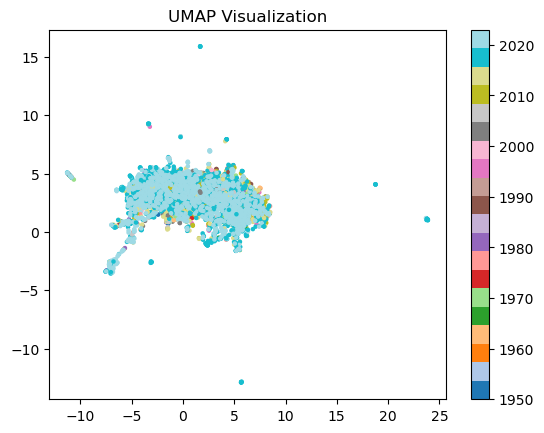

In [103]:
# UMAP Visualization of song level embedding colored by year (of classification)

import umap
import matplotlib.pyplot as plt

# Load a sample dataset (you can replace this with your own dataset)
X = doc_embeddings
labels = df.Year

# Create a UMAP object with desired parameters
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

# Fit the UMAP model to the data
embedding = umap_model.fit_transform(X)

# Visualize the embedding
plt.scatter(embedding[:, 0], embedding[:, 1], c = labels, cmap='tab20', s=5)
plt.title('UMAP Visualization')
plt.colorbar()
plt.show()


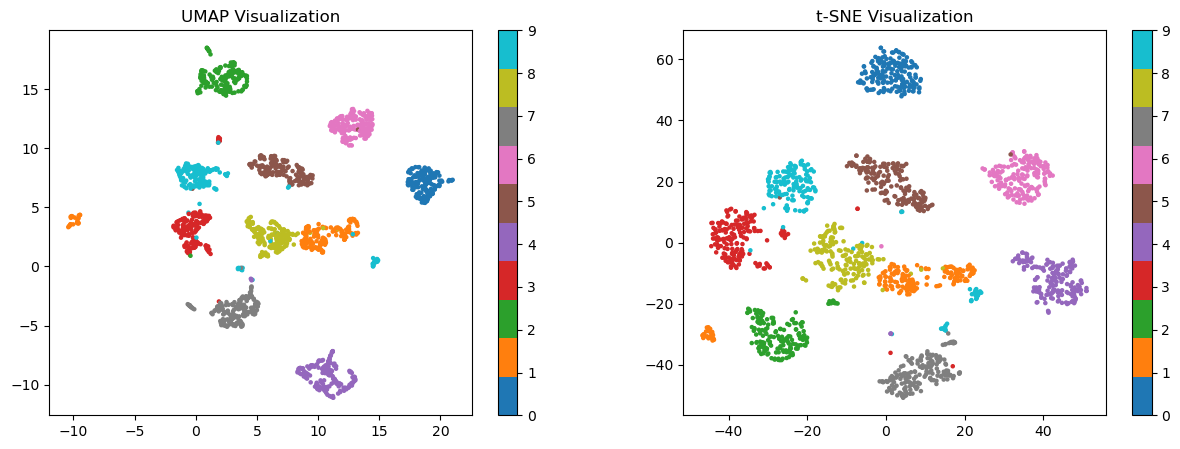

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import umap
import matplotlib.pyplot as plt

# Load a sample dataset (you can replace this with your own dataset)
data = load_digits()
X = data.data
labels = data.target

# Create a UMAP object with desired parameters
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)

# Fit the UMAP model to the data
embedding = umap_model.fit_transform(X)

# Visualize the embedding
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=5)
plt.title('UMAP Visualization')
plt.colorbar()

from sklearn.manifold import TSNE

# Load the digits dataset
data = load_digits()
X = data.data
labels = data.target

# Create a TSNE object with desired parameters
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42)

# Fit the TSNE model to the data
embedding = tsne_model.fit_transform(X)

# Visualize the embedding
plt.subplot(122)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=5)
plt.title('t-SNE Visualization')
plt.colorbar()
plt.show()



### Fine-tune Embeddings

In [50]:
# Cosine Similarity
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

# Measure WEAT
def S(w, A, B):
    emb_w = model.encode(w)
    simA = np.array([cosine_similarity(emb_w,model.encode(i)) for i in A])
    simB = np.array([cosine_similarity(emb_w,model.encode(i)) for i in B])

    return np.mean(simA) - np.mean(simB)

def WEAT(X, Y, A, B):
    
    X = [word for word in X if word in vocabulary]
    Y = [word for word in Y if word in vocabulary]
    A = [word for word in A if word in vocabulary]
    B = [word for word in B if word in vocabulary]
    # print(X,Y,A,B)
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    stdev = np.std( np.concatenate([X_AB, Y_AB]) )
    
    return (np.mean(X_AB) - np.mean(Y_AB)) / stdev

# T-statistic
def T(X, Y, A, B):

    X = [word for word in X if word in vocabulary]
    Y = [word for word in Y if word in vocabulary]
    A = [word for word in A if word in vocabulary]
    B = [word for word in B if word in vocabulary]
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    return np.sum(X_AB) - np.sum(Y_AB)

# Create a random equal size partition of X U Y
def partition(X,Y):

    U = np.array(X+Y)
    np.random.shuffle(U)
    U = list(U)
    
    return U[:len(Y)],U[len(Y):]

# Measure WEAT for n permutations of X,Y
def significance(X, Y, A, B, n = 1000):
    
    TESTS = []
    
    for _ in range(n):
        X_new, Y_new = partition(X,Y)
        TESTS.append(T(X_new, Y_new, A, B))
        print(TESTS[-1])
    TESTS = np.array(TESTS)

    return np.mean(TESTS > T(X, Y, A, B))

In [42]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2') # encode to 384 vector space
# model = SentenceTransformer('sentence-transformers/LaBSE') # 109 langs to shared 768dim vector space

In [53]:
print(WEAT(flowers, insects, pleasant, unpleasant))
print(WEAT(male, female, career, family))

print(WEAT(fiori, insetti, piacevole, spiacevole))
print(WEAT(maschio, femmina, carriera, famiglia))

1.666562
0.06394164
1.0063587
-0.39699286


In [43]:
v1 = model.encode('I like animals')
v2 = model.encode('mi piacciono i cani')
v3 = model.encode('vamos a bailar')

print(cosine_similarity(v1, v2))
print(cosine_similarity(v1, v3))

0.09275863
0.12290727


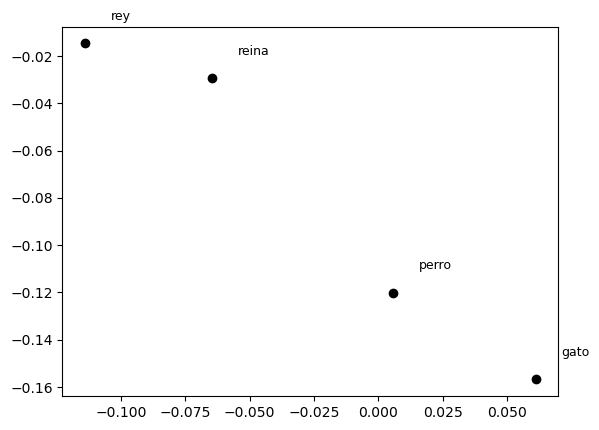

In [114]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(vectors_fullDim)

# Plot 2-dim
for w in ['rey', 'reina', 'perro', 'gato']:
    emb = model.encode(w)
    v = pca.transform(emb.reshape(1, -1)).ravel()
    plt.scatter(v[0],v[1], c='black')
    plt.text(v[0] + 0.01,v[1] + 0.01, w, fontsize=9)

#### BERT

In [56]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [106]:
import torch

def bert_embedding(w):
    
    tokens = tokenizer(w, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    hidden_state = outputs.last_hidden_state[0, 1:-1, :]  # [batch_size, sequence_length, hidden_size] --> skip special token, CLS - SEP

    return torch.mean(hidden_state, dim=0)

In [107]:
for w in ['king', 'queen']:
    print(cosine_similarity(bert_embedding(w), bert_embedding('male')))
    print(cosine_similarity(bert_embedding(w), bert_embedding('female')))
    

0.45002323
0.45541975
0.42627347
0.48058638


In [15]:
# Cosine Similarity
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

# Measure WEAT
def S(w, A, B):
    emb_w = bert_embedding(w)
    simA = np.array([cosine_similarity(emb_w,bert_embedding(i)) for i in A])
    simB = np.array([cosine_similarity(emb_w,bert_embedding(i)) for i in B])

    return np.mean(simA) - np.mean(simB)

def WEAT(X, Y, A, B):
    
    X = [word for word in X if word in vocabulary]
    Y = [word for word in Y if word in vocabulary]
    A = [word for word in A if word in vocabulary]
    B = [word for word in B if word in vocabulary]
    # print(X,Y,A,B)
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    stdev = np.std( np.concatenate([X_AB, Y_AB]) )
    
    return (np.mean(X_AB) - np.mean(Y_AB)) / stdev

# T-statistic
def T(X, Y, A, B):

    X = [word for word in X if word in vocabulary]
    Y = [word for word in Y if word in vocabulary]
    A = [word for word in A if word in vocabulary]
    B = [word for word in B if word in vocabulary]
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    return np.sum(X_AB) - np.sum(Y_AB)

# Create a random equal size partition of X U Y
def partition(X,Y):

    U = np.array(X+Y)
    np.random.shuffle(U)
    U = list(U)
    
    return U[:len(Y)],U[len(Y):]

# Measure WEAT for n permutations of X,Y
def significance(X, Y, A, B, n = 1000):
    
    TESTS = []
    
    for _ in range(n):
        X_new, Y_new = partition(X,Y)
        TESTS.append(T(X_new, Y_new, A, B))
        print(TESTS[-1])
    TESTS = np.array(TESTS)

    return np.mean(TESTS > T(X, Y, A, B))

In [24]:
print(WEAT(flowers, insects, pleasant, unpleasant))
print(WEAT(male, female, career, family))

print(WEAT(fiori, insetti, piacevole, spiacevole))
print(WEAT(maschio, femmina, carriera, famiglia))

NameError: name 'flowers' is not defined

### ITA LLM  
https://huggingface.co/dbmdz/bert-base-italian-cased

In [6]:
from transformers import AutoModel, AutoTokenizer

model_name = "dbmdz/bert-base-italian-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

In [7]:
import torch

def model_embedding(w):
         
    tokens = tokenizer(w, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    hidden_state = outputs.last_hidden_state[0, 1:-1, :]  # [batch_size, sequence_length, hidden_size] --> skip special token, CLS - SEP

    # tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=False)
    
    return torch.mean(hidden_state, dim=0).numpy()

In [11]:
import itertools

for i in list(itertools.product(['re', 'regina'], ['maschio', 'femmina'])):
    print(f'{i}: ', cosine_similarity(model_embedding(i[0]), model_embedding(i[1])))

('re', 'maschio'):  0.75007296
('re', 'femmina'):  0.7139251
('regina', 'maschio'):  0.7434157
('regina', 'femmina'):  0.80645865


In [63]:
maschio = ["fratello", "nonno", "suo", "figlio", "padre", "uomo", "maschio", "zio", "lui", "ragazzo"]
femmina = ["ragazza", "sua", "zia", "figlia", "sorella", "femminile", "madre", "lei", "nonna", "donna"]

carriera = ["azienda", "professionale", "carriera", "ufficio", "affari"]
famiglia = ["famiglia", "matrimonio", "bambini", "casa"]

fiori = ["lillà", "campanula", "viola", "crocus", "ranuncolo", "iris", "rosa", "tulipano", "margherita", "calendula", "narciso", "orchidea", "garofano", "magnolia", "giglio", "papavero", "trifoglio"]
insetti = ["scarafaggio", "maggot", "locusta", "blatta", "centopiedi", "bruco", "gorgoglio", "coleottero", "pulce", "libellula", "zanzara", "formica", "grillo", "falena", "ragno", "ape", "mosca"]

strumenti_musicali = ["banjo", "mandolino", "trombone", "violoncello", "violino", "tuba", "armonica", "arpa", "violino", "pianoforte", "tromba", "clarinetto", "oboe", "chitarra", "liuto", "sassofono", "corno", "bongo", "flauto", "campana", "viola", "tamburo"]
armi = ["arpione", "mazza", "ascia", "granata", "missile", "lancia", "ascia", "fucile", "cannone", "pugnale", "pistola", "fucile a canne mozze", "dinamite", "carro armato", "lama", "spada", "freccia", "frusta", "bomba", "coltello", "clava", "pistola"]

piacevole = ["famiglia", "onesto", "regalo", "meraviglioso", "vacanza", "miracolo", "leale", "piacere", "gentile", "arcobaleno", "amore", "pace", "fortunato", "onore", "libertà", "felice", "salute", "amico", "risata", "incoraggiamento", "gioia", "paradiso", "diploma", "paradiso", "diamante", "carezza", "alba"]
spiacevole = ["cancro", "agonia", "puzza", "malattia", "povertà", "incidente", "fallimento", "marcio", "odio", "terribile", "disastro", "tragedia", "dolore", "prigione", "abuso", "terribile", "brutto", "schifoso", "omicidio", "bomba", "veleno", "malvagità", "incidente", "morte", "guerra", "uccidere"]

In [64]:
# Get embeddings of each word in baskets
maschio_v = [model_embedding(w) for w in maschio]
femmina_v = [model_embedding(w) for w in maschio]

carriera_v = [model_embedding(w) for w in carriera]
famiglia_v = [model_embedding(w) for w in famiglia]

fiori_v = [model_embedding(w) for w in fiori]
insetti_v = [model_embedding(w) for w in insetti]

strumenti_musicali_v = [model_embedding(w) for w in strumenti_musicali]
armi_v = [model_embedding(w) for w in armi]

piacevole_v = [model_embedding(w) for w in piacevole]
spiacevole_v = [model_embedding(w) for w in spiacevole]

In [8]:
# Cosine Similarity
def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

# Measure WEAT
def S(w, A, B):
    # emb_w = model_embedding(w)
    emb_w = w
    simA = np.array([cosine_similarity(emb_w,i) for i in A])
    simB = np.array([cosine_similarity(emb_w,i) for i in B])

    return np.mean(simA) - np.mean(simB)

def WEAT(X, Y, A, B):
    
    # X = [word for word in X if word in vocabulary]
    # Y = [word for word in Y if word in vocabulary]
    # A = [word for word in A if word in vocabulary]
    # B = [word for word in B if word in vocabulary]
    # print(X,Y,A,B)
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    stdev = np.std( np.concatenate([X_AB, Y_AB]) )
    
    return (np.mean(X_AB) - np.mean(Y_AB)) / stdev

# T-statistic
def T(X, Y, A, B):

    # X = [word for word in X if word in vocabulary]
    # Y = [word for word in Y if word in vocabulary]
    # A = [word for word in A if word in vocabulary]
    # B = [word for word in B if word in vocabulary]
    X_AB = np.array([S(i, A,B) for i in X])
    Y_AB = np.array([S(i, A,B) for i in Y])
    
    return np.sum(X_AB) - np.sum(Y_AB)

# Create a random equal size partition of X U Y
def partition(X,Y):

    U = np.array(X+Y)
    np.random.shuffle(U)
    U = list(U)
    
    return U[:len(Y)],U[len(Y):]

# Measure WEAT for n permutations of X,Y
def significance(X, Y, A, B, n = 1000):
    
    TESTS = []
    
    for _ in range(n):
        X_new, Y_new = partition(X,Y)
        TESTS.append(T(X_new, Y_new, A, B))

    TESTS = np.array(TESTS)

    return np.mean(TESTS > T(X, Y, A, B))

In [70]:
print(WEAT(fiori_v, insetti_v, piacevole_v, spiacevole_v))

print(significance(fiori_v, insetti_v, piacevole_v, spiacevole_v))

0.51647615
0.078


In [71]:
print(WEAT(maschio_v, femmina_v, carriera_v, famiglia_v))

print(significance(maschio_v, femmina_v, carriera_v, famiglia_v))

0.0
0.508


In [72]:
print(WEAT(strumenti_musicali_v, armi_v, piacevole_v, spiacevole_v))

print(significance(fiori_v, insetti_v, piacevole_v, spiacevole_v))

0.2902965
0.063
